# Event Analysis

## Event Index

**Creating Topic Keywords**
1. Screen through news articles with certain keywords.
2. Compute the article's sentiment(tone).
3. Compute average sentiment of a the keyword across the news within a date.

> I have done that with a simple bag of words training with SKLEARN. 

> *tone.csv* contains the results from the last 1000 days (end date - Jan 4 2020)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
sns.set(rc={'figure.figsize':(15,8)})

In [0]:
tones = pd.read_csv('https://raw.githubusercontent.com/TheRockXu/The-Thomson-Reuters-NewsScope-Event-Indices/master/tones.csv',
                    index_col=0
                    )

In [4]:
tones.head()

,BANKRUPTCY,CENTRALBANK,DEBT,DEFLATION,DEREGULATION,EARNINGSREPORT,GOLDPRICE,HOUSING_PRICES,INFLATION,INTEREST_RATES,IPO,MIDDLECLASS,OILPRICE,STOCKMARKET,TRADE_DISPUTE
2017-04-09,-1.276374,-1.246536,-1.498465,-2.251255,-1.068793,0.829802,1.215356,-0.077347,-1.807100,-0.693983,-0.574639,-0.534429,-1.623634,-0.510501,-0.963561
2017-04-10,-2.244661,-1.348246,-0.985720,-1.380286,-0.704278,0.515690,0.701042,-0.399413,-1.200714,-1.161459,0.444972,0.237336,-1.361982,-0.471732,-1.990400
2017-04-11,-1.941728,-1.153365,-1.352571,-1.714919,-0.522298,-1.048609,0.178827,-0.362397,-1.728338,-0.798828,0.186947,-0.802987,-1.549866,-0.437737,-2.011145
2017-04-12,-2.389003,-1.201531,-1.321453,-0.530007,-0.681633,0.461880,-0.099267,0.053199,-1.584719,-0.970536,0.736317,-1.254727,-1.240727,-0.344081,-2.094756
2017-04-13,-1.927125,-1.201129,-1.160912,-1.106246,-0.897061,1.045318,0.746861,0.266789,-0.962933,-0.731985,0.297371,-2.077893,-1.261938,-0.239772,-1.877077


### Step One - Define Functions to Calculate z-score

In [0]:
def get_zscore(df, days=60):
  mean = df.rolling(days).mean()
  std = df.rolling(days).mean()
  zscore = (df - mean)/std
  return zscore


### Step Two - Get ETF data from various markets

In [0]:
etf_data = pd.read_csv('https://raw.githubusercontent.com/TheRockXu/The-Thomson-Reuters-NewsScope-Event-Indices/master/etf_data.csv', index_col='Date')

In [7]:
etf_data.columns

Index(['USO', 'SPY', 'VCLT', 'IWM', 'GLD'], dtype='object')

**Use log price**

In [0]:
etf_returns = np.log(etf_data).diff().dropna()

### Step 3 - Extract Events

> What is an event?

> In this case, whenever the sentiment score's absolute zscore is above or below 0.2. 

In [0]:
tones_zscore = get_zscore(tones).dropna()

In [10]:
tones_zscore.tail()

,BANKRUPTCY,CENTRALBANK,DEBT,DEFLATION,DEREGULATION,EARNINGSREPORT,GOLDPRICE,HOUSING_PRICES,INFLATION,INTEREST_RATES,IPO,MIDDLECLASS,OILPRICE,STOCKMARKET,TRADE_DISPUTE
2019-12-30,0.075662,-0.280760,0.081584,0.194891,0.458519,-0.150383,0.261017,-1.316213,0.061839,-0.277748,-0.459837,0.413208,0.118872,0.865358,-0.293890
2019-12-31,0.192409,-0.123476,0.038919,-0.238478,0.478253,-0.250365,-0.684565,-6.849476,-0.105233,-0.020991,1.190488,-0.019915,0.144758,2.028255,-0.230376
2020-01-01,0.181215,-0.243202,0.116148,-0.126340,0.066970,0.671467,-0.395317,-8.686592,0.336087,-0.005868,-1.771745,0.646806,0.483211,1.502037,-0.144710
2020-01-02,-0.244260,-0.667563,-0.253538,-0.035442,-0.281694,-0.154822,0.412409,-5.349543,-0.107946,-0.603682,-1.890439,-0.097970,-0.097486,-0.376954,-0.263331
2020-01-03,-0.081737,0.035765,-0.163861,0.102891,0.213520,-0.184950,-3.401267,-4.257883,0.019986,0.536624,-1.090481,0.119767,1.672117,4.682079,0.063610


### Step 4 Event Analysis

> This function is a simple event analysis that compares the distributions of returns of returns on event dates vs the the overall distribution.

In [0]:
def event_analysis(event_name, ticker, thres=0.2):
  # thres is the zcore threhold to get an event
  event = tones_zscore[event_name]
  event = event[np.abs(event)>thres]
  data = etf_returns[ticker]
  index = [i for i in event.index if i in data.index]
  target_data = data.loc[index]

  sns.distplot(target_data, label='%s_event_returns'%event_name)
  sns.distplot(data, label='%s_normal_returns'%ticker)
  plt.legend();


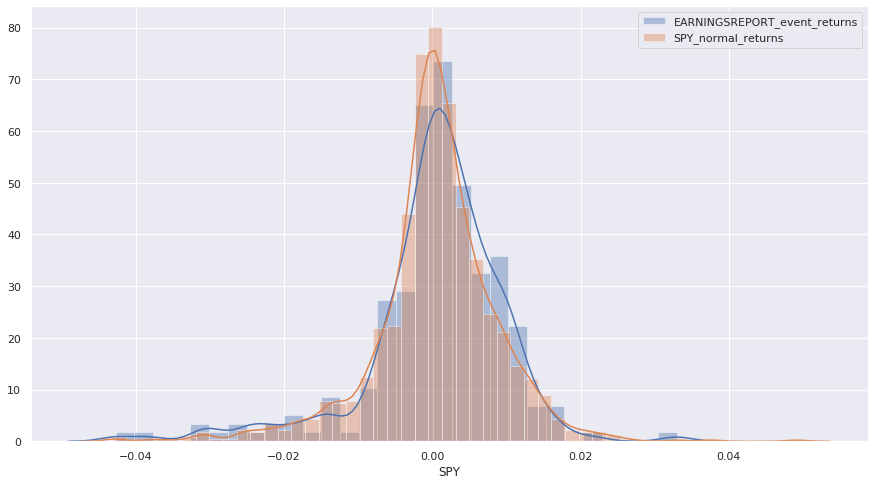

In [12]:
event_analysis('EARNINGSREPORT', 'SPY', thres=0.4)

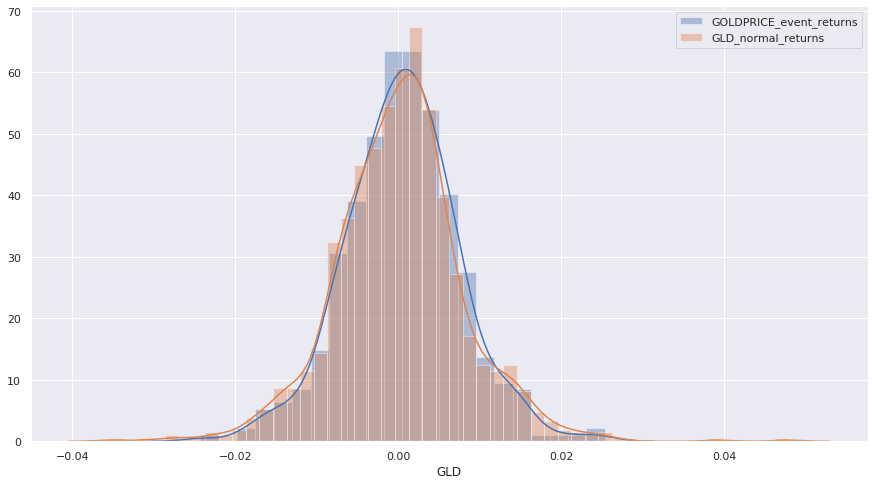

In [13]:
event_analysis('GOLDPRICE', 'GLD', thres=0.5)

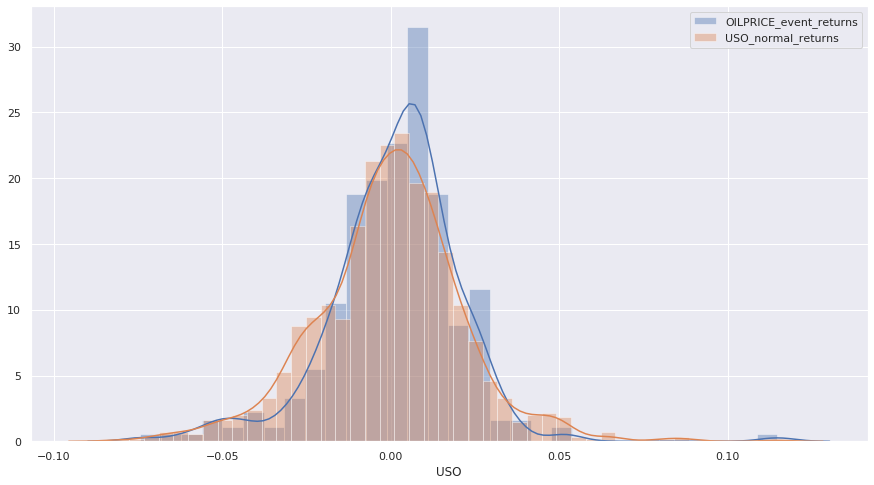

In [14]:
event_analysis('OILPRICE', 'USO')

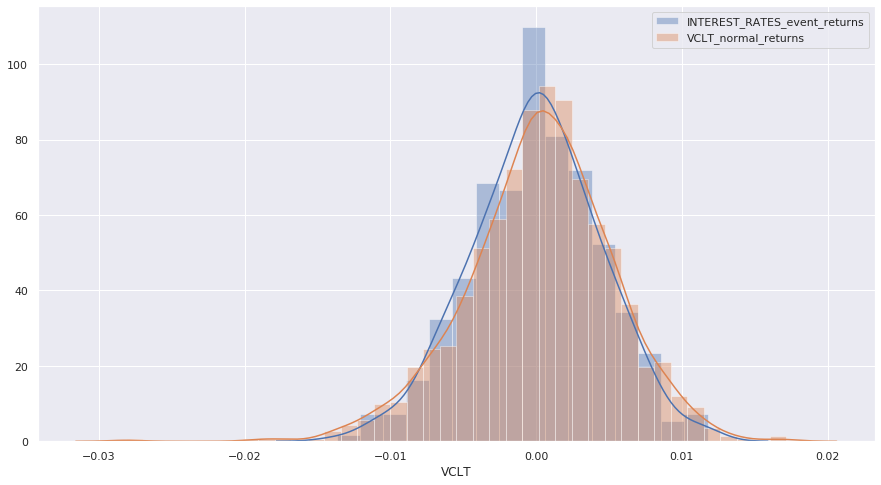

In [15]:
event_analysis('INTEREST_RATES', 'VCLT')

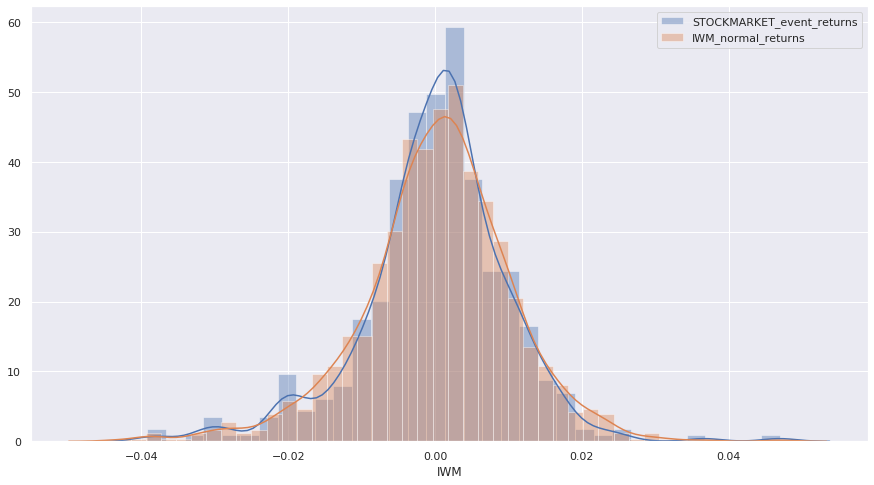

In [16]:
event_analysis('STOCKMARKET', 'IWM', thres=0.5)